In [1]:
"""
Tanapat 
PopQuants
Created : 21/03/2020
"""

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='colorblind')
%matplotlib inline

In [75]:
'''
รายชื่อ กองทุน etf ราย sector ขนาดใหญ่ของอเมริกา
HealthCare                   = xlv
ConsumerDiscretionary        = xly
Technology                   = xlk
ConsumerStaples              = xlp
Utilities                    = xlu
Financial                    = xlf
Industrial                   = xli
Energy                       = xle
BasicMaterials               = xlb
iShares MSCI Thailand Capped = thd
'''


sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary', 'thd':'MSCI Thailand'}


Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb','thd']    

#Symbol = Symbol+".BK"
start = '2020/1/1'
end = '2020/03/20'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

In [76]:
Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

In [77]:
daily_returns

Symbols,HealthCare,ConsumerDiscretionary,Technology,ConsumerStaples,Utilities,Financial,Industrial,Energy,BasicMaterials,MSCI Thailand
Date,,,,,,,,,,
2020-01-02,0.002651,0.011880,0.018763,-0.007939,-0.012535,0.009747,0.018903,0.008994,-0.011723,0.011644
2020-01-03,-0.008714,-0.008510,-0.011243,-0.001600,0.002037,-0.010618,-0.001928,-0.002971,-0.016145,-0.013428
2020-01-06,0.006223,0.002782,0.002383,0.002084,0.000938,-0.000650,0.000362,0.007781,-0.004354,-0.010294
2020-01-07,-0.001963,-0.001585,-0.000432,-0.007679,-0.001406,-0.006508,-0.002051,-0.002629,-0.001177,-0.001849
2020-01-08,0.006492,0.003016,0.010700,0.003708,-0.000469,0.006551,0.003385,-0.016472,0.003536,-0.010420
2020-01-09,0.004300,0.005302,0.011336,0.007067,0.005479,0.006183,0.004217,0.007369,0.003691,0.006786
2020-01-10,0.000292,-0.005432,-0.002326,-0.000638,0.002647,-0.007439,-0.007079,-0.005653,-0.004012,0.007554
2020-01-13,-0.003502,0.003166,0.012507,0.006543,0.006056,0.006843,0.008218,0.000334,0.012924,0.003345
2020-01-14,0.006052,-0.000316,-0.004711,0.000317,0.002933,-0.001942,0.000120,0.000167,-0.004143,-0.008737


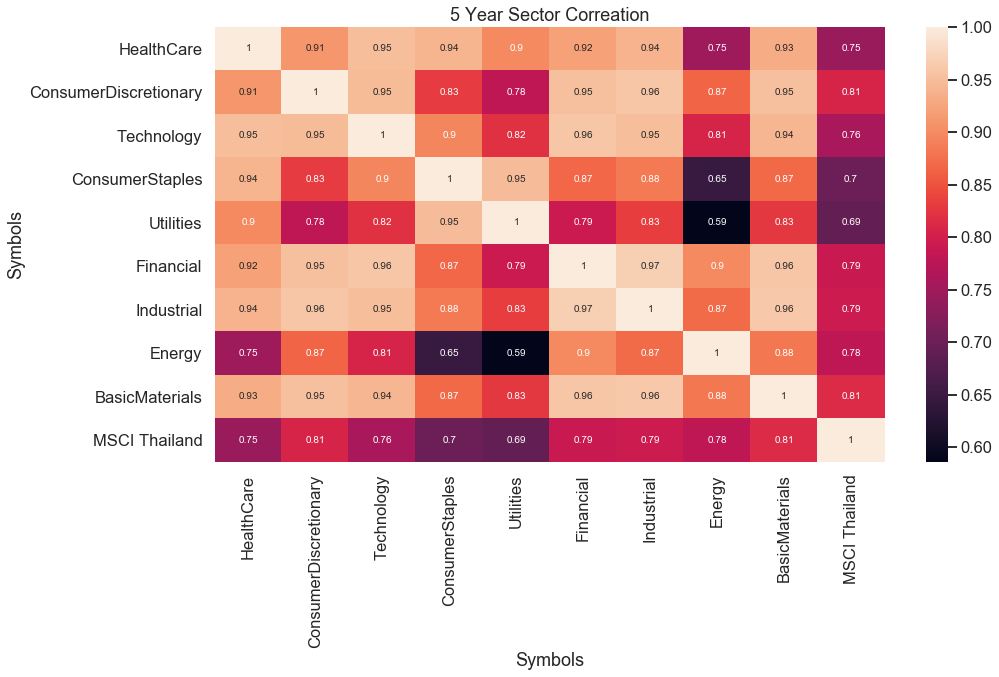

In [78]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("5 Year Sector Correation")
plt.savefig("/Users/tanapat/Documents/finno-ml-investment/finno-ml-investment/corr_etf.png")

The Industrials Sector includes companies whose businesses are dominated by one of the following activities: The manufacture and distribution of capital goods, including aerospace & defense, construction, engineering & building products, electrical equipment and industrial machinery. The provision of commercial services and supplies, including printing, employment, environmental and office services. The provision of transportation services, including airlines, couriers, marine, road & rail and transportation infrastructure.

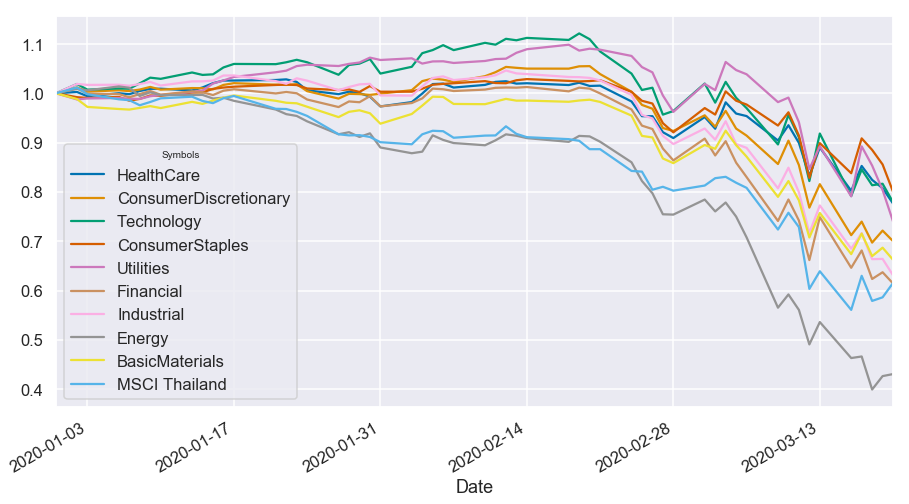

In [79]:
#ผลตอบแทนสะสมเทียบกับ set
#https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

etf_return = Price.apply(lambda x: x / x[0])
etf_return.plot(figsize=(15,8))
plt.savefig('/Users/tanapat/Documents/finno-ml-investment/finno-ml-investment/daily_etf.png')

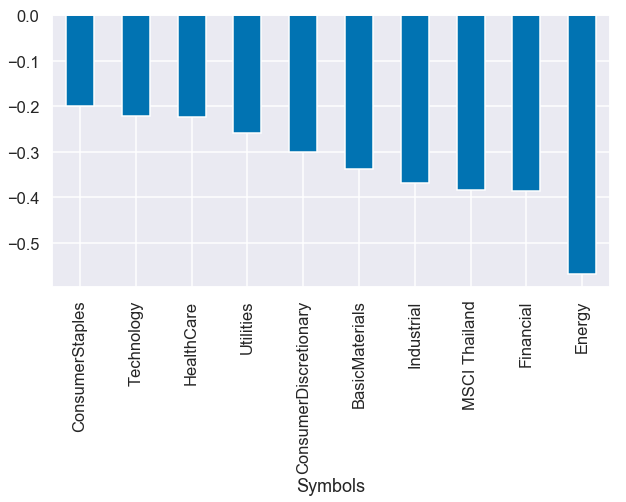

In [86]:
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(10,5))
plt.savefig('/Users/tanapat/Documents/finno-ml-investment/finno-ml-investment/return_rank.png')

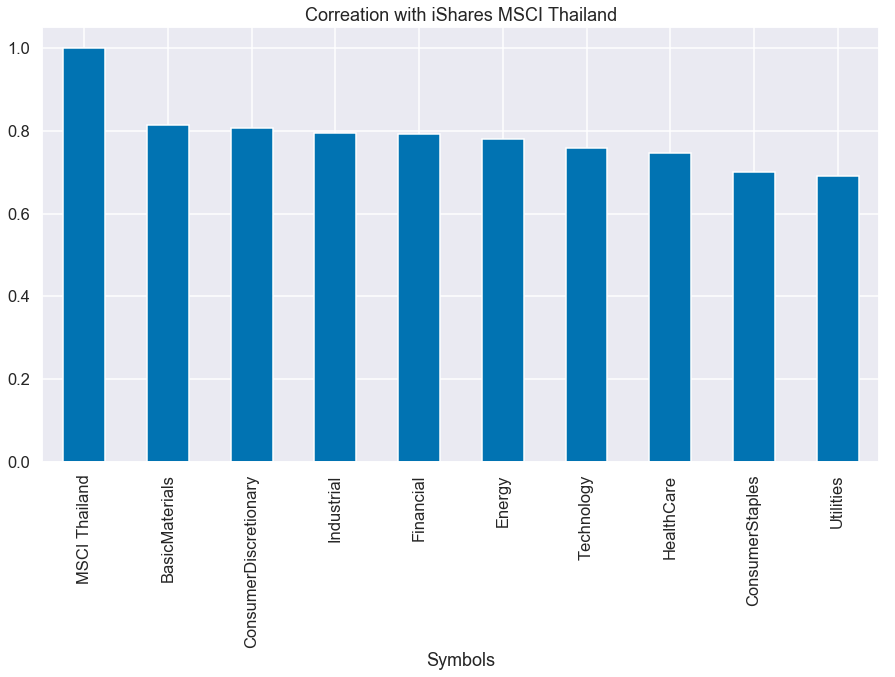

In [81]:
#ความสัมพันธ์กับ set
corr.iloc[-1,0:].sort_values(ascending = False).plot.bar(figsize=(15,8)).set_title("Correation with iShares MSCI Thailand")
plt.savefig('/Users/tanapat/Documents/finno-ml-investment/finno-ml-investment/rank_returns.png')

In [87]:
#หาสมการ ทำนาย set

import statsmodels.api as sm

X = daily_returns.iloc[:,1:10]
#X = daily_returns.iloc[:,-1:0]
y = daily_returns[['MSCI Thailand']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MSCI Thailand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.080e+29
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:55:00   Log-Likelihood:                 1938.8
No. Observations:                  55   AIC:                            -3858.
Df Residuals:                      45   BIC:                            -3838.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.169e-16   1.95e-17     -5.981      0.000   -1.56e-16   -7.75e-17
ConsumerDiscretionary  -1.11e-16   2.48e-15     -0.045      0.965   -5.11e-15    4.89e-15
Technology            -4.441e-16   2.19e-15     -0.203      0.840   -4.85e-15    3.96e-15
ConsumerStaples         2.22e-16   2.82e-15      0.079      0.938   -5.45e-15    5.89e-15
Utilities              4.441e-16   1.77e-15      0.251      0.803   -3.12e-15    4.01e-15
Financial              3.886e-16   2.74e-15      0.142      0.888   -5.13e-15     5.9e-15
Industrial              2.22e-16   2.73e-15      0.081      0.936   -5.28e-15    5.72e-15
Energy                         0   1.38e-15          0      1.000   -2.77e-15    2.77e-15
BasicMaterials        -3.331e-16    2.6e-15     -0.128      0.899   -5.58e-15    4.91e-15
MSCI Thailand             1.0000   7.97e-16   1.25e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       24.662   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.739
Skew:                           1.424   Prob(JB):                     1.93e-10
Kurtosis:                       6.378   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
predictions

Date
2020-01-02    1.164388e-02
2020-01-03   -1.342815e-02
2020-01-06   -1.029397e-02
2020-01-07   -1.849024e-03
2020-01-08   -1.042030e-02
2020-01-09    6.786028e-03
2020-01-10    7.553677e-03
2020-01-13    3.344878e-03
2020-01-14   -8.736573e-03
2020-01-15   -4.406875e-03
2020-01-16    1.013399e-02
2020-01-17    4.497225e-03
2020-01-21   -2.605905e-02
2020-01-22   -4.713966e-04
2020-01-23   -5.896226e-03
2020-01-24   -8.659589e-03
2020-01-27   -3.888955e-02
2020-01-28   -2.490002e-03
2020-01-29    4.992625e-04
2020-01-30   -3.992107e-03
2020-01-31   -1.164821e-02
2020-02-03   -4.688921e-03
2020-02-04    2.253624e-02
2020-02-05    7.844663e-03
2020-02-06   -9.884091e-04
2020-02-07   -1.434583e-02
2020-02-10    4.767941e-03
2020-02-11    3.746101e-04
2020-02-12    2.022223e-02
2020-02-13   -1.639550e-02
2020-02-14   -7.339176e-03
2020-02-18   -4.386041e-03
2020-02-19   -3.650010e-03
2020-02-20   -1.882271e-02
2020-02-21   -1.090062e-16
2020-02-24   -4.969745e-02
2020-02-25   -1.761242e

In [83]:
X = daily_returns[['HealthCare']]
y = daily_returns[['MSCI Thailand']]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          MSCI Thailand   R-squared (uncentered):                   0.565
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              70.28
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    2.39e-11
Time:                        16:38:43   Log-Likelihood:                          119.06
No. Observations:                  55   AIC:                                     -236.1
Df Residuals:                      54   BIC:                                     -234.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HealthCare     1.1140      0.133      8.383      0.000       0.848       1.380
==============================================================================
Omnibus:                        9.132   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               18.906
Skew:                           0.250   Prob(JB):                     7.84e-05
Kurtosis:                       5.828   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
etf_return.iloc[-1]

Symbols
HealthCare               0.776458
ConsumerDiscretionary    0.700128
Technology               0.779099
ConsumerStaples          0.800254
Utilities                0.740019
Financial                0.614360
Industrial               0.630907
Energy                   0.430713
BasicMaterials           0.662325
MSCI Thailand            0.615411
Name: 2020-03-20 00:00:00, dtype: float64

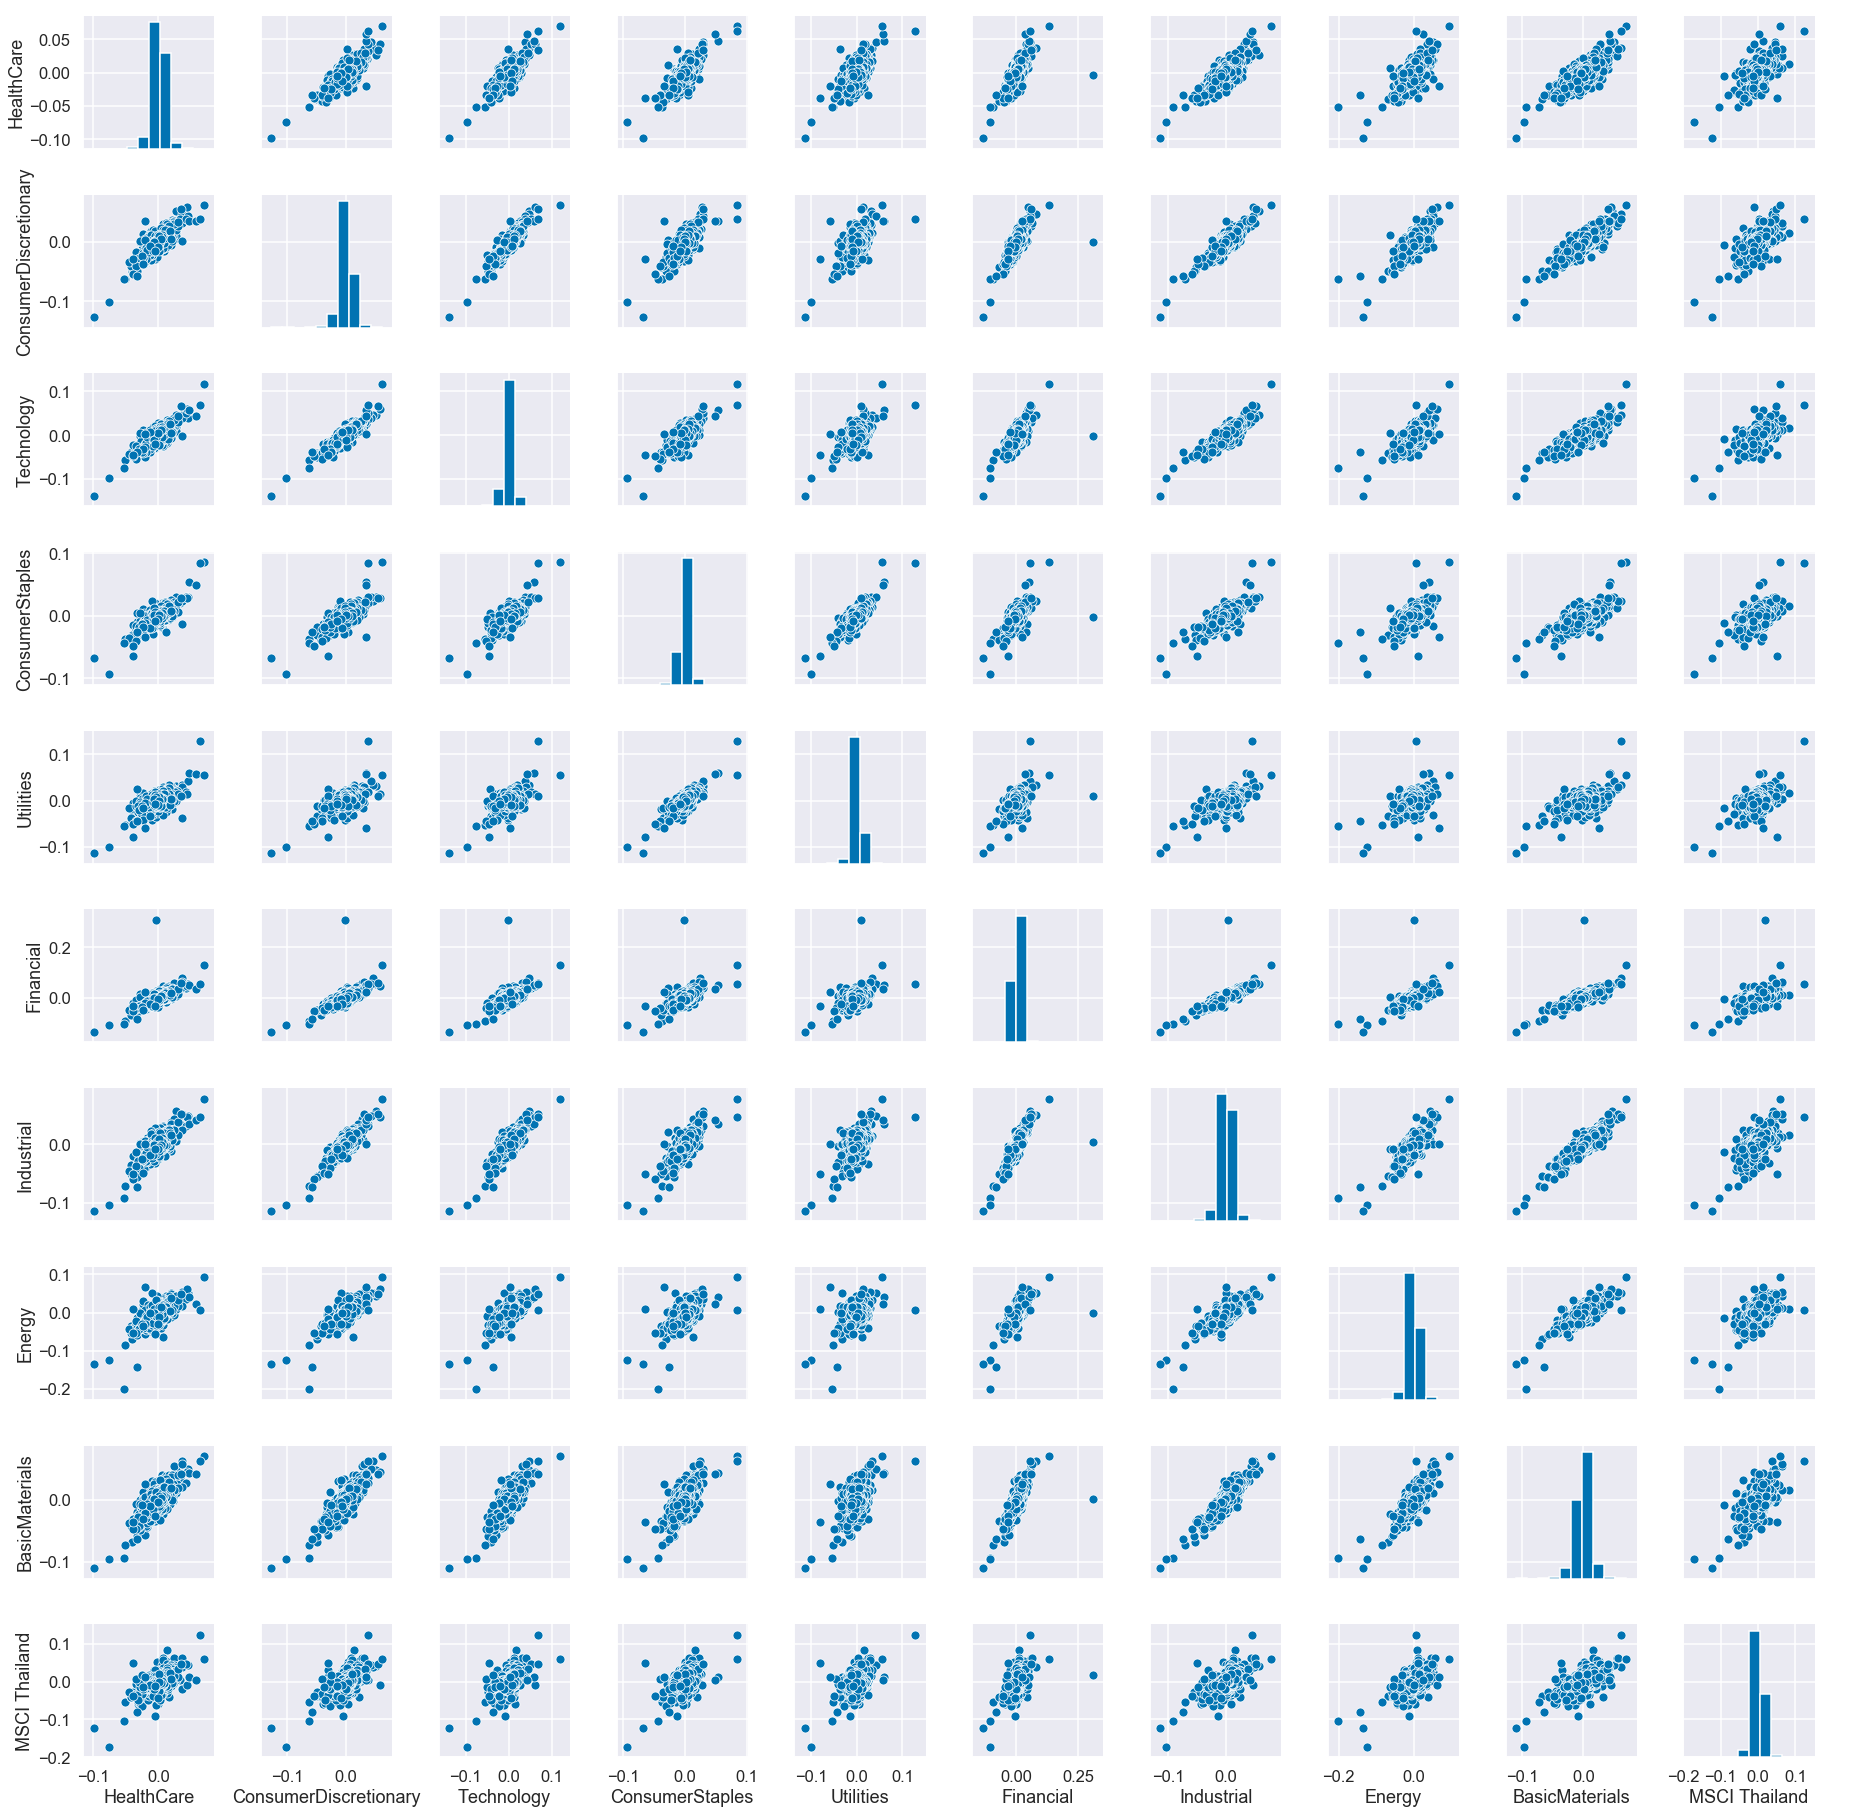

In [74]:
etf_pairplot = sns.pairplot(daily_returns, size=2.5)